<a href="https://colab.research.google.com/github/pachterlab/LSCHWCP_2023/blob/main/Notebooks/Supp_Fig_9/Supp_Fig_9ab/enrichment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enrichment analysis of predictive genes

In [1]:
!pip install -q gget anndata
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import anndata
import gget
from tqdm import tqdm
TQDM_BAR_FORMAT = (
    "{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]"
)
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import textwrap
%config InlineBackend.figure_format='retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.9 MB/s eta 0:00:00


### Perform enrichment analyses:

In [2]:
!wget https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/Notebooks/Supp_Fig_9/Supp_Fig_9ab/gene_weights.csv
gene_df = pd.read_csv("gene_weights.csv")
gene_df.head()

--2023-12-13 06:54:17--  https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/Notebooks/Supp_Fig_9/Supp_Fig_9ab/gene_weights.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 784586 (766K) [text/plain]
Saving to: ‘gene_weights.csv’

gene_weights.csv    100%[===================>] 766.20K  --.-KB/s    in 0.04s   

2023-12-13 06:54:17 (18.7 MB/s) - ‘gene_weights.csv’ saved [784586/784586]



,Unnamed: 0,u10 Ensembl ID,u10 weight,u102540 Ensembl ID,u102540 weight,u11150 Ensembl ID,u11150 weight,u202260 Ensembl ID,u202260 weight,u39566 Ensembl ID,u39566 weight,u134800 Ensembl ID,u134800 weight,u102324 Ensembl ID,u102324 weight
0,0,ENSMMUG00000056618.1,0.427253,ENSMMUG00000060506.1,0.595079,ENSMMUG00000065375.1,0.739395,ENSMMUG00000010528.4,1.719808,ENSMMUG00000007240.4,1.326722,ENSMMUG00000017936.4,0.894326,ENSMMUG00000063314.1,1.245991
1,1,ENSMMUG00000051078.1,0.329022,ENSMMUG00000054927.1,0.453654,ENSMMUG00000062154.1,0.274679,ENSMMUG00000046639.2,1.695687,ENSMMUG00000060377.1,1.249671,ENSMMUG00000049479.1,0.775719,ENSMMUG00000042245.2,1.200575
2,2,ENSMMUG00000019302.4,0.309845,ENSMMUG00000010860.4,0.345496,ENSMMUG00000008678.4,0.265010,ENSMMUG00000063208.1,1.392800,ENSMMUG00000055257.1,1.243913,ENSMMUG00000062072.1,0.765200,ENSMMUG00000057850.1,1.098150
3,3,ENSMMUG00000016670.4,0.298107,ENSMMUG00000050854.1,0.321943,ENSMMUG00000051307.1,0.253002,ENSMMUG00000020608.4,1.348042,ENSMMUG00000064658.1,1.204233,ENSMMUG00000062408.1,0.764933,ENSMMUG00000022366.4,1.004854
4,4,ENSMMUG00000050458.1,0.291562,ENSMMUG00000041006.2,0.305653,ENSMMUG00000060294.1,0.249523,ENSMMUG00000052442.1,1.324035,ENSMMUG00000014822.4,1.123155,ENSMMUG00000061849.1,0.691772,ENSMMUG00000051607.1,0.981911


In [3]:
virs = ['u10', 'u102540', 'u11150', 'u202260']

In [4]:
# Number of genes to get gene names from
n_genes = 200

Plot gene weight distributions:

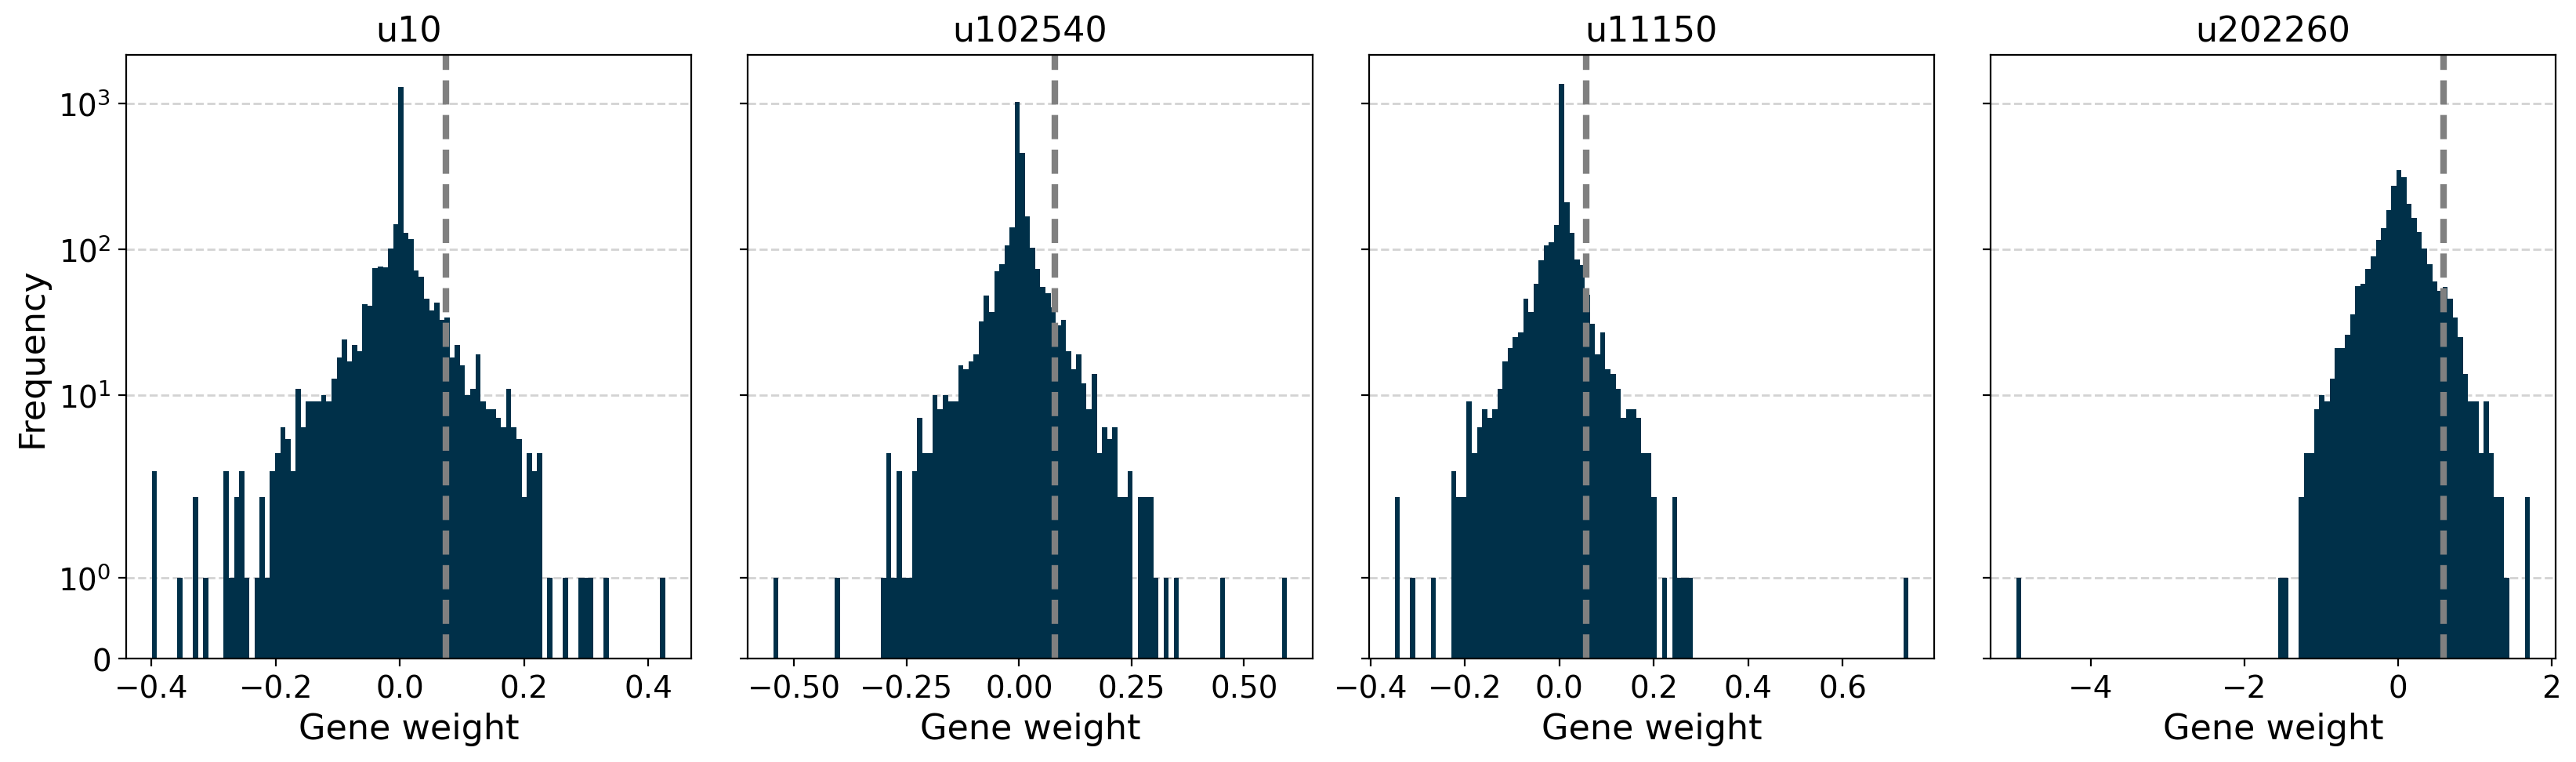

In [5]:
fig, axs = plt.subplots(figsize =(20, 5), ncols=4, sharey=True)
fontsize = 14

col_idx = 0
for vir in virs:
    ax = axs[col_idx]
    ax.hist(gene_df[f"{vir} weight"].values, bins = 100, color="#003049")
    ax.set_title(vir, fontsize=fontsize+2)

    ax.grid(True, which="both", color='lightgray', ls="--", lw=1)
    ax.set_axisbelow(True)
    ax.xaxis.grid(False)

    ax.set_yscale("symlog")
    ax.tick_params(axis="both", labelsize=fontsize)

    if col_idx == 0:
        ax.set_ylabel("Frequency", fontsize=fontsize+2)
    ax.set_xlabel("Gene weight", fontsize=fontsize+2)

    # Shoe cut-off based on X number of top genes
    ax.axvline(gene_df[f"{vir} weight"].values[n_genes], ls="--", color="grey", lw=3)

    col_idx += 1

plt.subplots_adjust(wspace=0.1, hspace=0.2)

fig.savefig(
    "gene_weight_distributions.png", dpi=300, bbox_inches="tight", transparent=True
)

fig.show()

Get gene symbols from Ensembl and perform enrichment analysis:

In [6]:
# Enrichr database(s)
database = "Microbe_Perturbations_from_GEO_up"
database2 = "KEGG_2021_Human"

u10:

In [7]:
# Get gene symbols/names from Ensembl ID with gget info
u10_info_df = gget.info(gene_df["u10 Ensembl ID"][:n_genes].values, verbose=False)
u10_info_df.head()

,ensembl_id,uniprot_id,pdb_id,ncbi_gene_id,species,assembly_name,primary_gene_name,ensembl_gene_name,synonyms,parent_gene,protein_names,ensembl_description,uniprot_description,ncbi_description,subcellular_localisation,object_type,biotype,canonical_transcript,seq_region_name,strand,start,end,all_transcripts,transcript_biotypes,transcript_names,transcript_strands,transcript_starts,transcript_ends,all_exons,exon_starts,exon_ends,all_translations,translation_starts,translation_ends
ENSMMUG00000056618,ENSMMUG00000056618.1,"[A0A5F8AHW4, F7EC56]",NaN,695240,macaca_mulatta,Mmul_10,LIPA,LIPA,[],NaN,Lipase,"lipase A, lysosomal acid type [Source:VGNC Sym...",,NaN,"[nan, nan]",Gene,protein_coding,ENSMMUT00000108179.1,9,-1,89485613,89525810,"[ENSMMUT00000108179.1, ENSMMUT00000101549.1]","[protein_coding, protein_coding]","[LIPA-201, LIPA-202]","[-1, -1]","[89485613, 89487495]","[89525810, 89522028]",NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000051078,ENSMMUG00000051078.1,A0A5F8A969,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,[nan],NaN,NaN,Gene,protein_coding,ENSMMUT00000086055.1,19,1,51507340,51512835,[ENSMMUT00000086055.1],[protein_coding],[nan],[1],[51507340],[51512835],NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000019302,ENSMMUG00000019302.4,F6S9W7,NaN,694451,macaca_mulatta,Mmul_10,TNFSF10,TNFSF10,[TNLG6A],NaN,Tumor necrosis factor ligand superfamily member,TNF superfamily member 10 [Source:VGNC Symbol;...,,NaN,"[Membrane, Secreted]",Gene,protein_coding,ENSMMUT00000027108.4,2,-1,77429441,77448519,[ENSMMUT00000027108.4],[protein_coding],[TNFSF10-201],[-1],[77429441],[77448519],NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000016670,ENSMMUG00000016670.4,F6VU61,NaN,713614,macaca_mulatta,Mmul_10,RNF20,RNF20,[],NaN,E3 ubiquitin protein ligase,ring finger protein 20 [Source:VGNC Symbol;Acc...,,NaN,[Nucleus],Gene,protein_coding,ENSMMUT00000093344.1,15,-1,41313705,41345866,"[ENSMMUT00000093344.1, ENSMMUT00000023429.4, E...","[protein_coding, protein_coding, protein_coding]","[RNF20-201, RNF20-202, RNF20-203]","[-1, -1, -1]","[41313705, 41317367, 41318283]","[41344353, 41345866, 41345648]",NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000050458,ENSMMUG00000050458.1,A0A5F8ATP1,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,[nan],NaN,NaN,Gene,protein_coding,ENSMMUT00000095561.1,16,1,50201739,50202761,[ENSMMUT00000095561.1],[protein_coding],[nan],[1],[50201739],[50202761],NaN,NaN,NaN,NaN,NaN,NaN


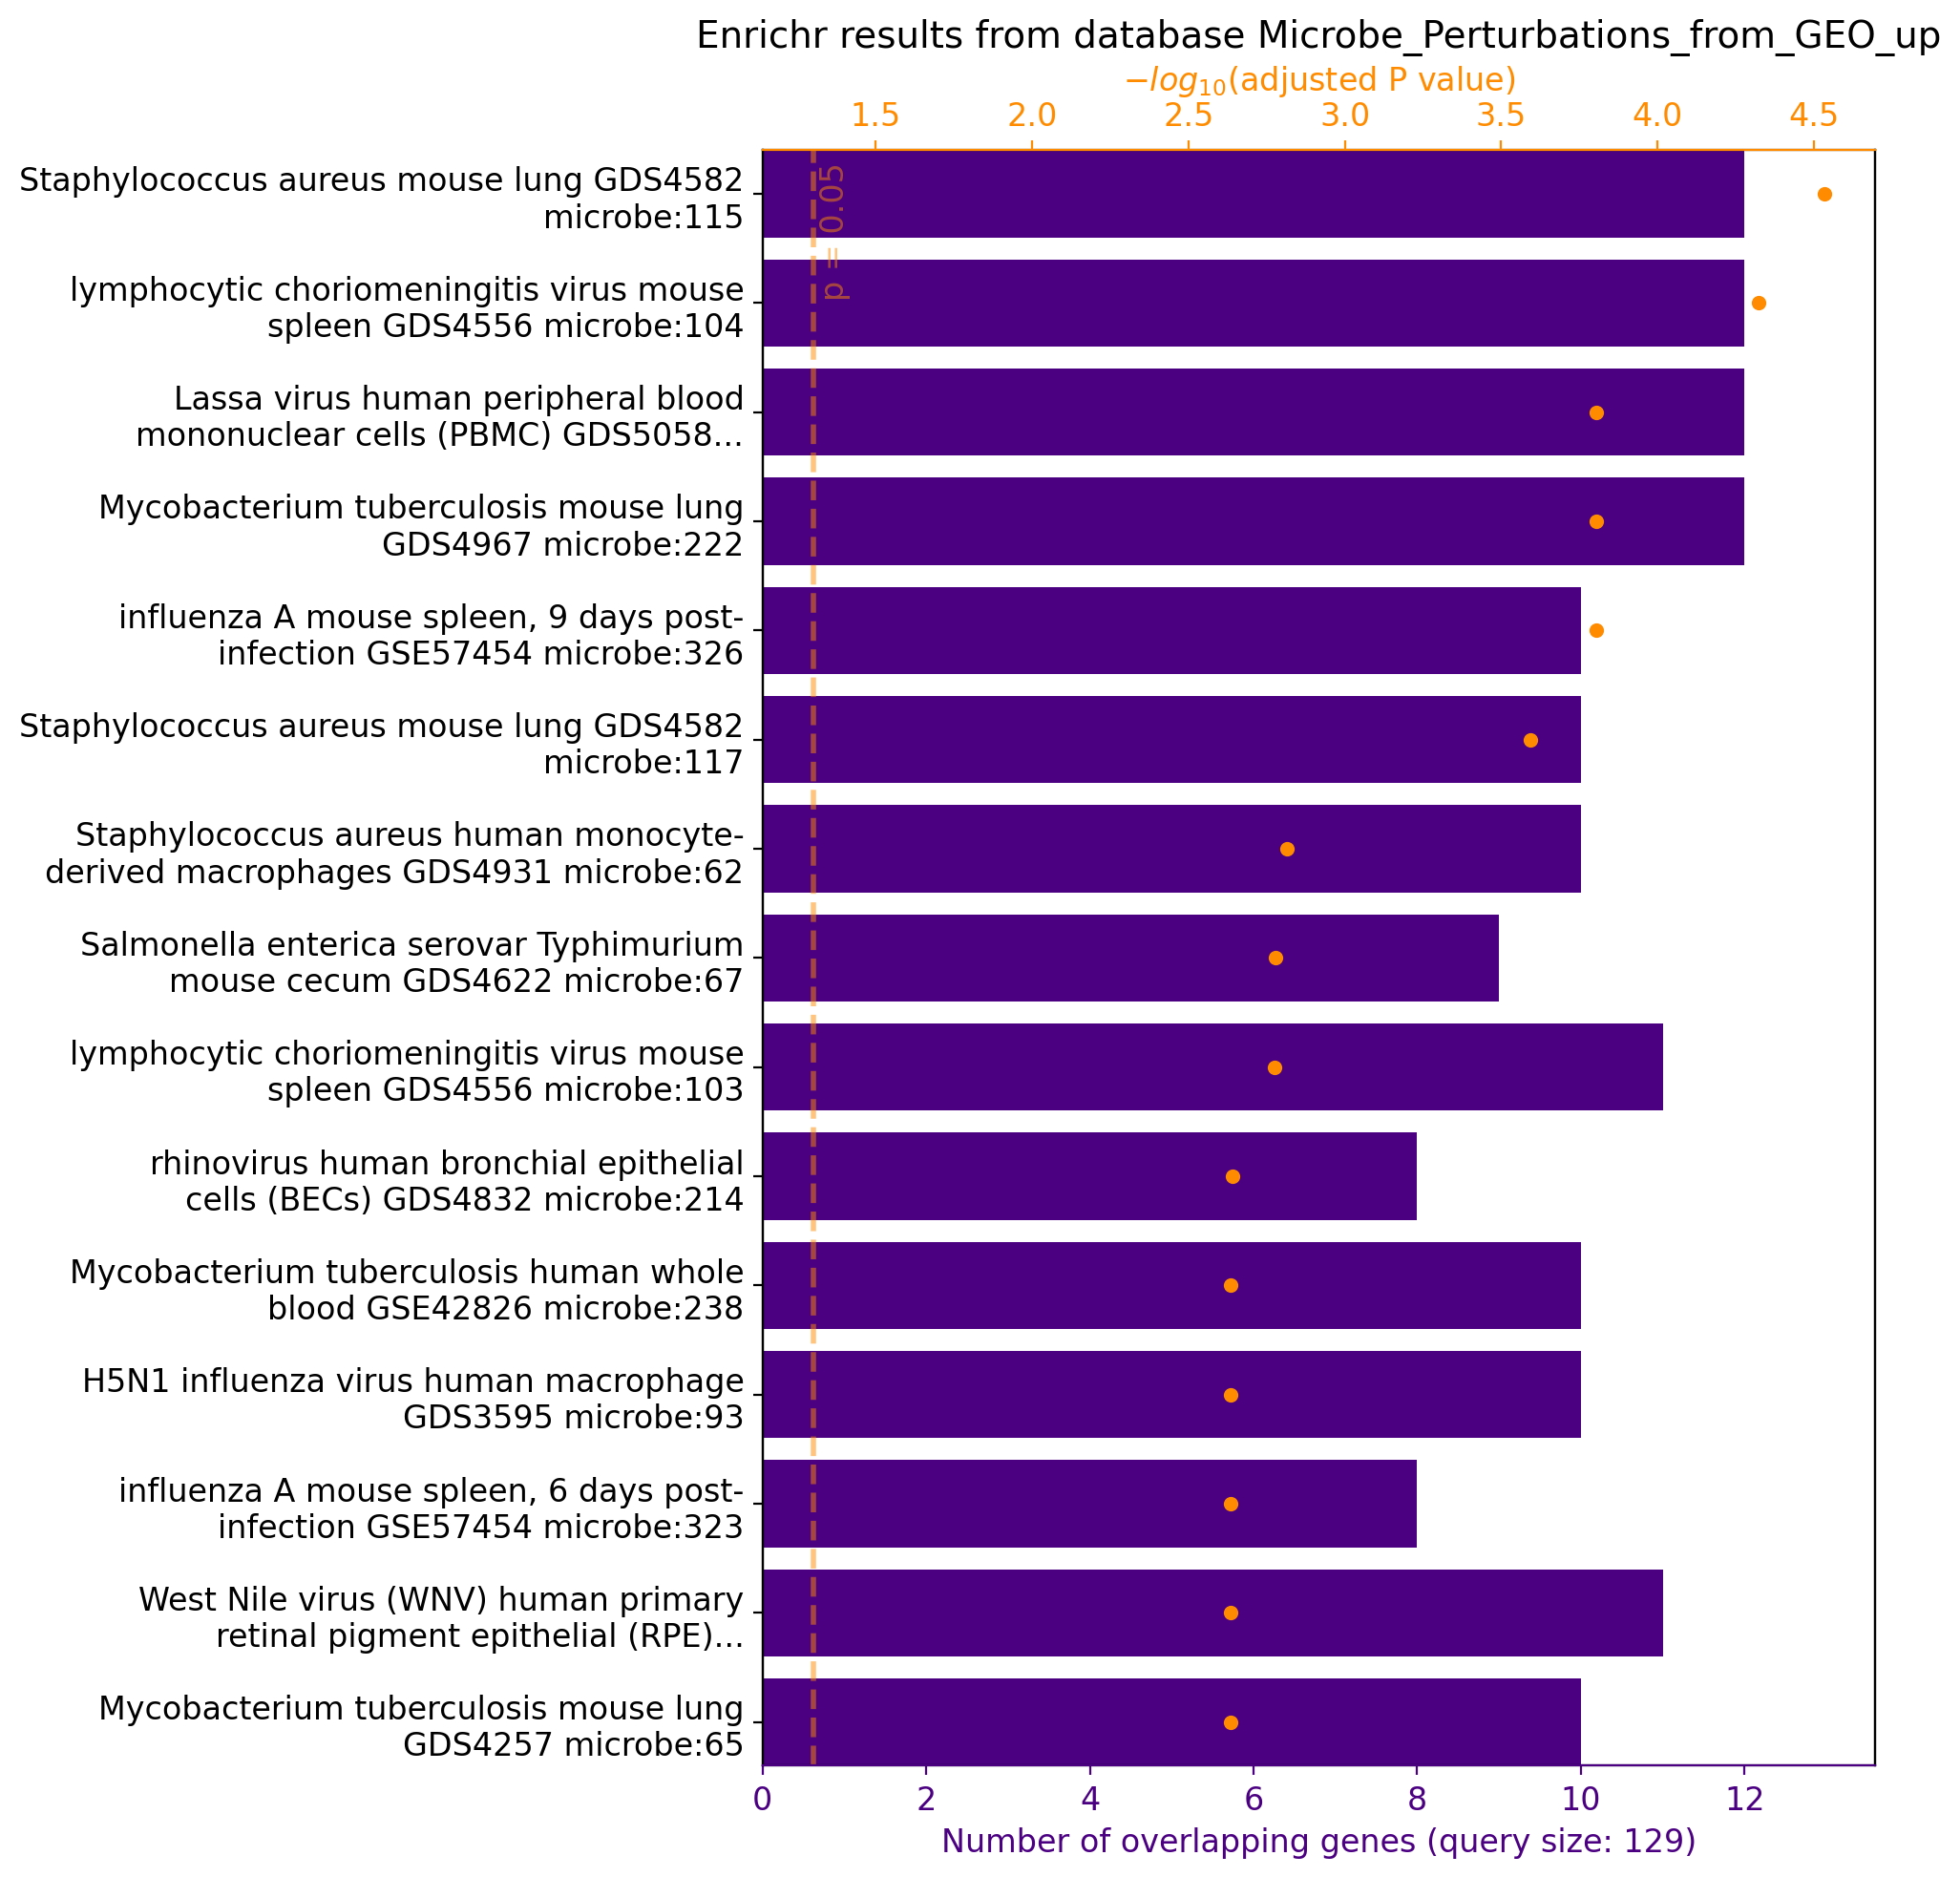

In [8]:
# Perform enrichment analysis
u10_enrichr_df = gget.enrichr(u10_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database, background=True, plot=True)

In [9]:
u10_enrichr_df_kegg = gget.enrichr(u10_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database2, background=True)
u10_enrichr_df_kegg

,rank,path_name,p_val,z_score,combined_score,overlapping_genes,adj_p_val,database
0,1,ECM-receptor interaction,0.002155,7.893148,48.463797,"[RELN, VWF, ITGA2, COL6A5]",0.206156,KEGG_2021_Human
1,2,Cytokine-cytokine receptor interaction,0.002383,4.088194,24.689700,"[CCL24, IL1RL1, IFNG, TGFB3, TNFSF10, INHBB, C...",0.206156,KEGG_2021_Human
2,3,Malaria,0.003631,10.513898,59.069018,"[SELP, IFNG, TGFB3]",0.209401,KEGG_2021_Human
3,4,Focal adhesion,0.008034,4.261665,20.558830,"[SHC4, RELN, VWF, ITGA2, COL6A5]",0.229273,KEGG_2021_Human
4,5,FoxO signaling pathway,0.008616,5.251258,24.965356,"[TGFB3, TNFSF10, IRS2, GADD45G]",0.229273,KEGG_2021_Human
...,...,...,...,...,...,...,...,...
168,169,Calcium signaling pathway,0.775294,0.671880,0.171002,[CCKBR],0.793645,KEGG_2021_Human
169,170,Endocytosis,0.791554,0.639379,0.149460,[PSD3],0.802664,KEGG_2021_Human
170,171,Pathways of neurodegeneration,0.793385,0.677966,0.156913,"[DNAH10, ATP6]",0.802664,KEGG_2021_Human
171,172,Herpes simplex virus 1 infection,0.812059,0.649756,0.135267,"[IFNG, ZNF658]",0.816781,KEGG_2021_Human


u11150:

In [10]:
u11150_info_df = gget.info(gene_df["u11150 Ensembl ID"][:n_genes].values, verbose=False)
u11150_info_df.head()

,ensembl_id,uniprot_id,pdb_id,ncbi_gene_id,species,assembly_name,primary_gene_name,ensembl_gene_name,synonyms,parent_gene,protein_names,ensembl_description,uniprot_description,ncbi_description,subcellular_localisation,object_type,biotype,canonical_transcript,seq_region_name,strand,start,end,all_transcripts,transcript_biotypes,transcript_names,transcript_strands,transcript_starts,transcript_ends,all_exons,exon_starts,exon_ends,all_translations,translation_starts,translation_ends
ENSMMUG00000065375,ENSMMUG00000065375.1,Q6IYH3,NaN,2846629,macaca_mulatta,Mmul_10,ATP6,ATP6,[],NaN,ATP synthase subunit a,ATP synthase F0 subunit 6 [Source:NCBI gene (f...,Mitochondrial membrane ATP synthase (F(1)F(0) ...,NaN,"[Membrane, Mitochondrion inner membrane]",Gene,protein_coding,ENSMMUT00000110393.1,MT,1,8518,9198,[ENSMMUT00000110393.1],[protein_coding],[ATP6-201],[1],[8518],[9198],NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000062154,ENSMMUG00000062154.1,NaN,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,Gene,pseudogene,ENSMMUT00000090324.1,1,-1,131841368,131848061,[ENSMMUT00000090324.1],[pseudogene],[nan],[-1],[131841368],[131848061],NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000008678,ENSMMUG00000008678.4,"[A0A5F7ZNG3, F7EZ68, G7MQR7]",NaN,700855,macaca_mulatta,Mmul_10,SIRT5,SIRT5,[],NaN,"NAD-dependent protein deacylase sirtuin-5, mit...",sirtuin 5 [Source:VGNC Symbol;Acc:VGNC:77485],"NAD-dependent lysine demalonylase, desuccinyla...",NaN,"[Mitochondrion, Cytoplasm, cytosol, Nucleus]",Gene,protein_coding,ENSMMUT00000012134.4,4,-1,156384675,156435604,"[ENSMMUT00000102539.1, ENSMMUT00000070701.2, E...","[protein_coding, protein_coding, protein_codin...","[SIRT5-201, SIRT5-202, SIRT5-203, SIRT5-204, S...","[-1, -1, -1, -1, -1, -1, -1, -1]","[156384675, 156384726, 156387098, 156387170, 1...","[156425265, 156424979, 156424765, 156424794, 1...",NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000051307,ENSMMUG00000051307.1,NaN,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,Gene,lncRNA,ENSMMUT00000100887.1,16,-1,20781192,20790427,"[ENSMMUT00000093394.1, ENSMMUT00000100887.1]","[lncRNA, lncRNA]","[nan, nan]","[-1, -1]","[20781192, 20781192]","[20790427, 20788136]",NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000060294,ENSMMUG00000060294.1,F7HAP4,NaN,696629,macaca_mulatta,Mmul_10,H2AC6,H2AC6,[HIST1H2AC],NaN,Histone H2A,H2A clustered histone 6 [Source:VGNC Symbol;Ac...,,NaN,"[Chromosome, Nucleus]",Gene,protein_coding,ENSMMUT00000057350.2,4,-1,143851758,143868220,[ENSMMUT00000057350.2],[protein_coding],[H2AC6-201],[-1],[143851758],[143868220],NaN,NaN,NaN,NaN,NaN,NaN


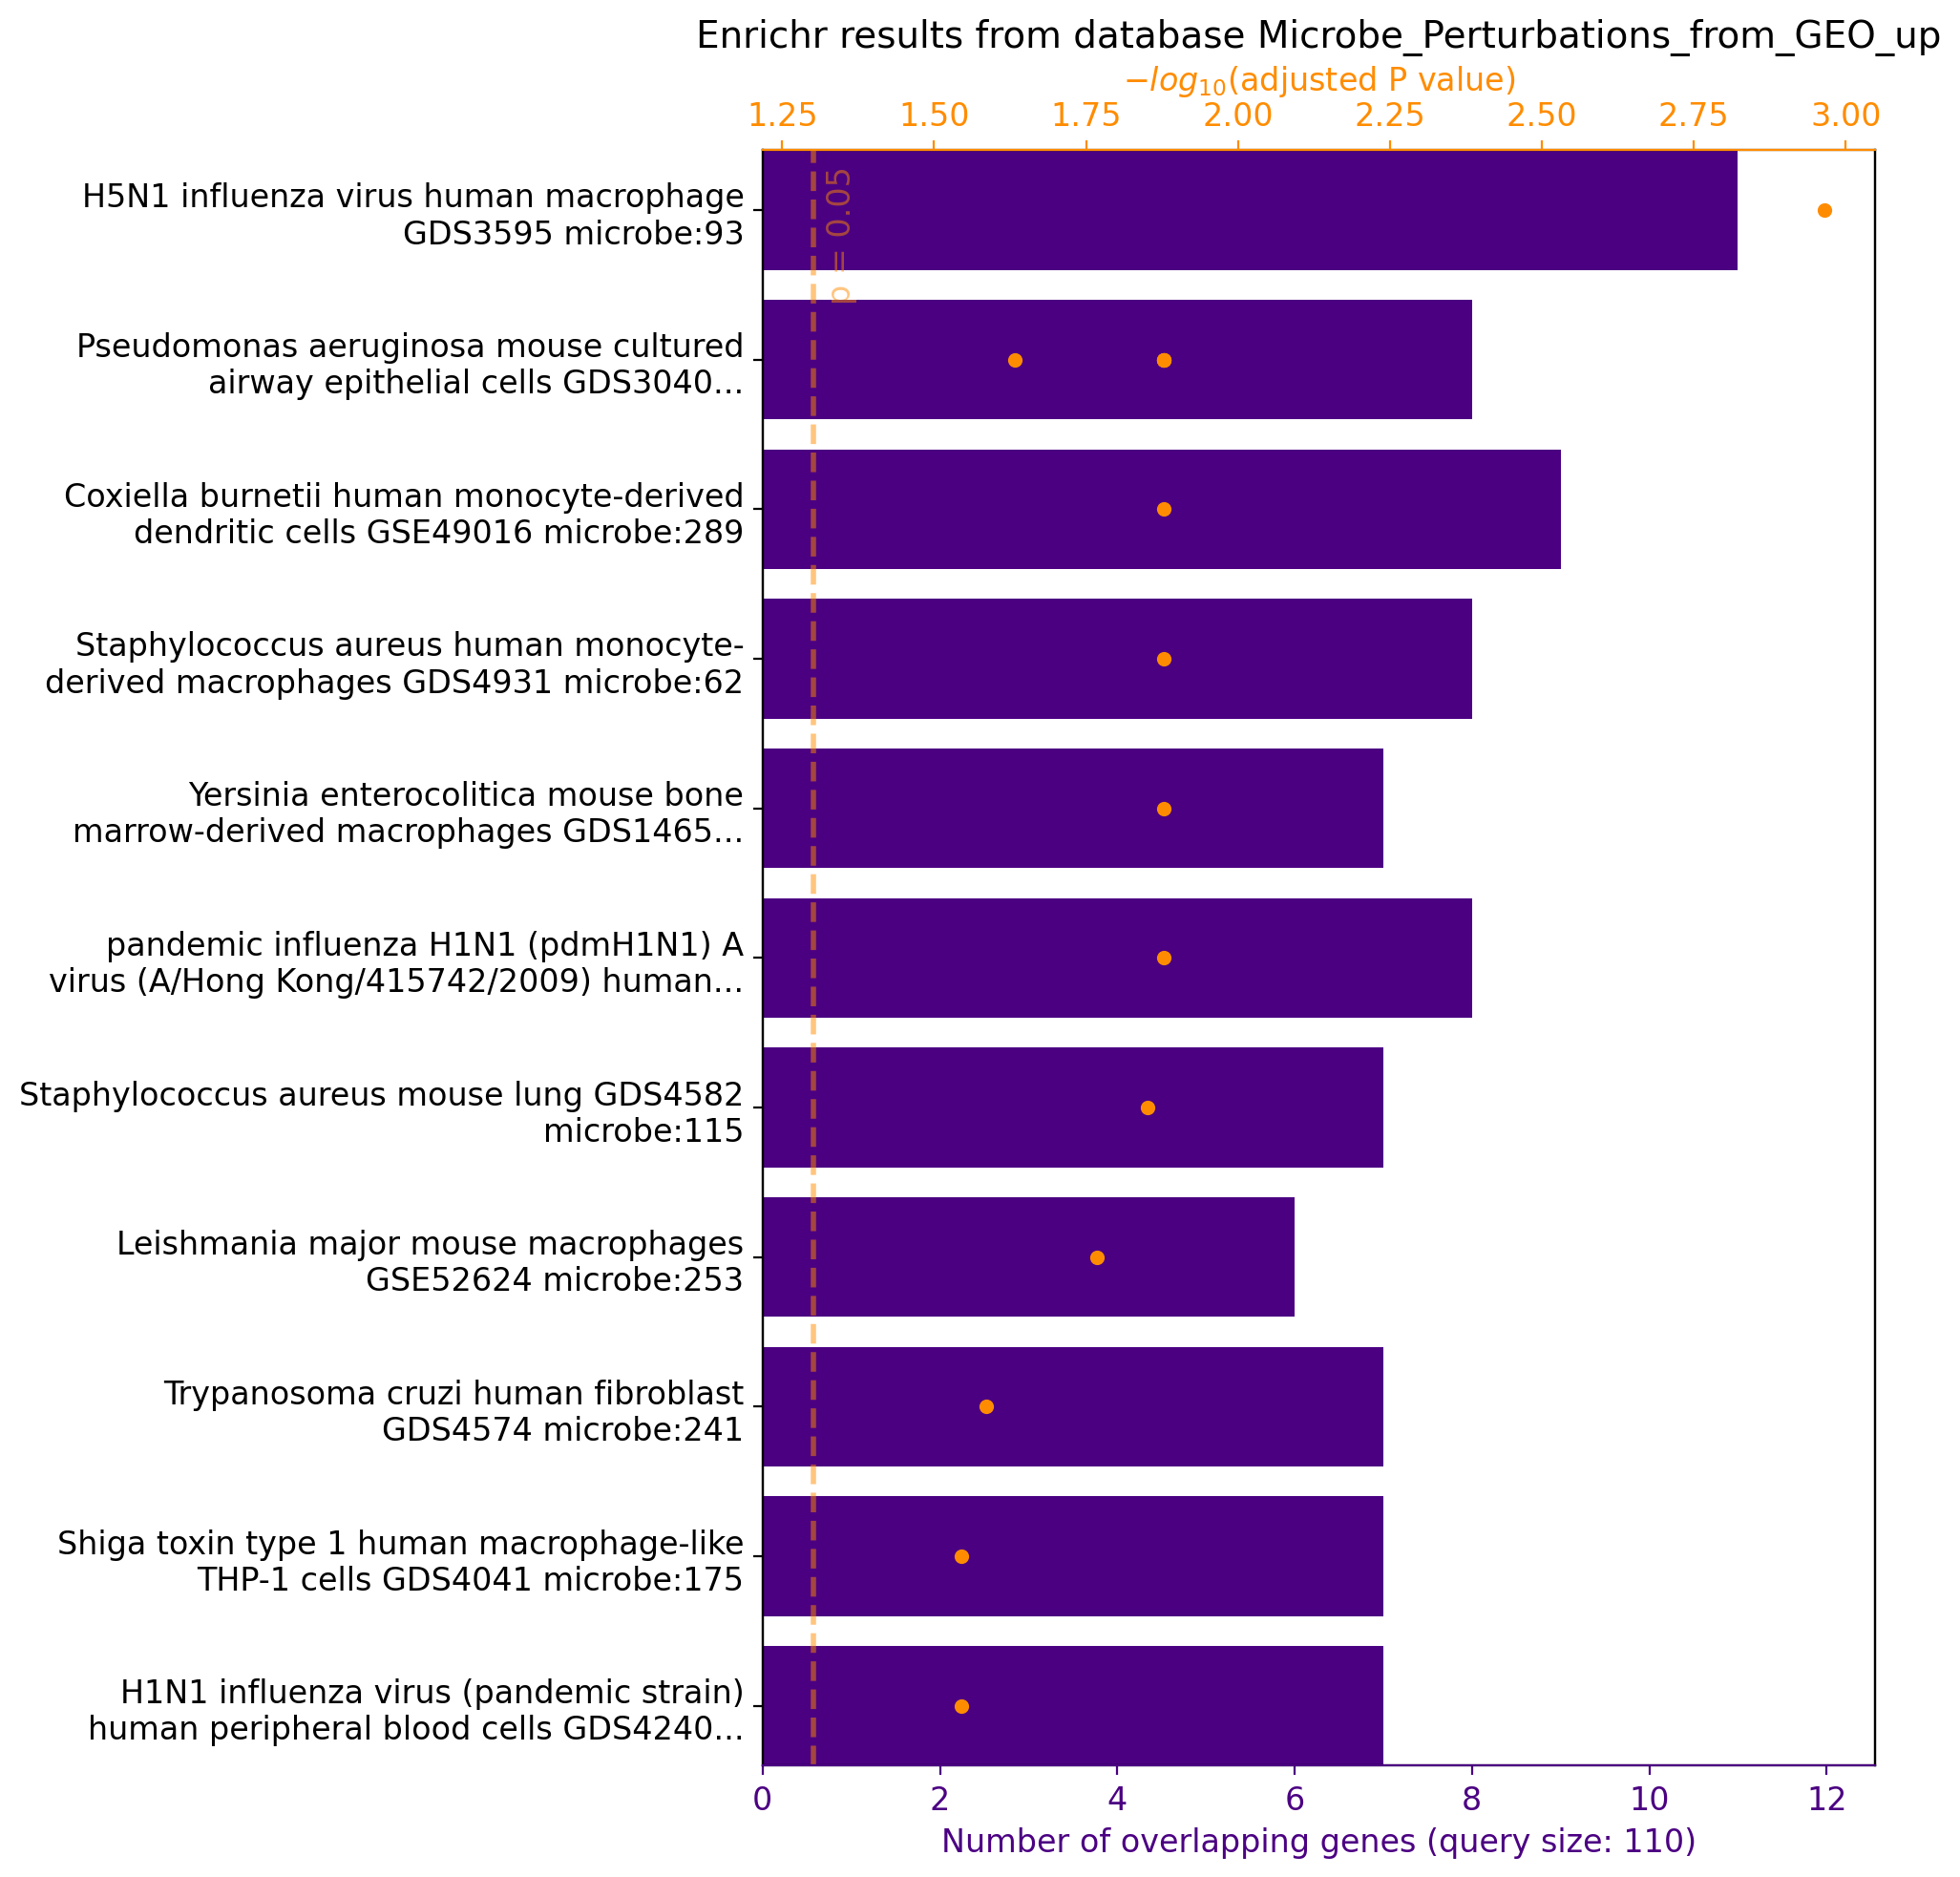

In [11]:
u11150_enrichr_df = gget.enrichr(u11150_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database, background=True, plot=True)

In [12]:
u11150_enrichr_df_kegg = gget.enrichr(u11150_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database2, background=True)
u11150_enrichr_df_kegg

,rank,path_name,p_val,z_score,combined_score,overlapping_genes,adj_p_val,database
0,1,FoxO signaling pathway,0.000589,7.987059,59.401308,"[MAPK11, IRS1, IRS2, GADD45G, IGF1R]",0.103064,KEGG_2021_Human
1,2,Viral protein interaction with cytokine and cy...,0.001841,8.250809,51.960487,"[CXCL9, CCL4L1, TNFRSF10A, CCL18]",0.161059,KEGG_2021_Human
2,3,Autophagy,0.005552,5.989997,31.109286,"[CTSL, IRS1, IRS2, IGF1R]",0.260815,KEGG_2021_Human
3,4,Apoptosis,0.006457,5.727874,28.883133,"[CTSL, LMNA, TNFRSF10A, GADD45G]",0.260815,KEGG_2021_Human
4,5,Hypertrophic cardiomyopathy,0.011544,6.765584,30.185034,"[EDN1, MYL2, LMNA]",0.260815,KEGG_2021_Human
...,...,...,...,...,...,...,...,...
170,171,Calcium signaling pathway,0.715561,0.799439,0.267564,[HRH2],0.732299,KEGG_2021_Human
171,172,Parkinson disease,0.728738,0.770085,0.243687,[ATP6],0.741448,KEGG_2021_Human
172,173,Huntington disease,0.799227,0.624405,0.139936,[ATP6],0.808466,KEGG_2021_Human
173,174,Human papillomavirus infection,0.823164,0.578167,0.112511,[RELN],0.827895,KEGG_2021_Human


u202260:

In [13]:
u202260_info_df = gget.info(gene_df["u202260 Ensembl ID"][:n_genes].values, verbose=False)
u202260_info_df.head()

,ensembl_id,uniprot_id,pdb_id,ncbi_gene_id,species,assembly_name,primary_gene_name,ensembl_gene_name,synonyms,parent_gene,protein_names,ensembl_description,uniprot_description,ncbi_description,subcellular_localisation,object_type,biotype,canonical_transcript,seq_region_name,strand,start,end,all_transcripts,transcript_biotypes,transcript_names,transcript_strands,transcript_starts,transcript_ends,all_exons,exon_starts,exon_ends,all_translations,translation_starts,translation_ends
ENSMMUG00000010528,ENSMMUG00000010528.4,A0A1D5R2I2,NaN,NaN,macaca_mulatta,Mmul_10,ZNF33B,ZNF33B,[],NaN,NaN,zinc finger protein 33B [Source:HGNC Symbol;Ac...,[nan],NaN,NaN,Gene,protein_coding,ENSMMUT00000061021.2,9,-1,40455909,40504089,[ENSMMUT00000061021.2],[protein_coding],[ZNF33B-201],[-1],[40455909],[40504089],NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000046639,ENSMMUG00000046639.2,"[A0A1D5Q3B6, A0A5F7ZVK6, A0A1D5QJ25]",NaN,712342,macaca_mulatta,Mmul_10,OAS3,OAS3,[],NaN,2'-5' oligoadenylate synthase,2'-5'-oligoadenylate synthetase 3 [Source:VGNC...,,NaN,Cytoplasm,Gene,protein_coding,ENSMMUT00000059502.2,11,1,112660500,112689922,"[ENSMMUT00000090125.1, ENSMMUT00000065666.2, E...","[protein_coding, protein_coding, protein_codin...","[OAS3-201, OAS3-202, OAS3-203, OAS3-204]","[1, 1, 1, 1]","[112660500, 112661357, 112661418, 112661481]","[112686711, 112689922, 112689867, 112687232]",NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000063208,ENSMMUG00000063208.1,NaN,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,Gene,lncRNA,ENSMMUT00000079397.1,6,1,177068218,177076184,[ENSMMUT00000079397.1],[lncRNA],[nan],[1],[177068218],[177076184],NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000020608,ENSMMUG00000020608.4,"[A0A5F7ZAT8, G7NEL5]",NaN,716146,macaca_mulatta,Mmul_10,ABCA1,ABCA1,[],NaN,"[nan, nan]",ATP binding cassette subfamily A member 1 [Sou...,,NaN,Membrane,Gene,protein_coding,ENSMMUT00000099695.1,15,1,37954747,38098656,"[ENSMMUT00000028999.4, ENSMMUT00000099695.1]","[protein_coding, protein_coding]","[ABCA1-201, ABCA1-202]","[1, 1]","[37954747, 37979838]","[38098656, 38098656]",NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000052442,ENSMMUG00000052442.1,A0A5F7ZRR0,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,Secreted protein,NaN,[nan],NaN,NaN,Gene,protein_coding,ENSMMUT00000098741.1,4,-1,148578301,148580089,[ENSMMUT00000098741.1],[protein_coding],[nan],[-1],[148578301],[148580089],NaN,NaN,NaN,NaN,NaN,NaN


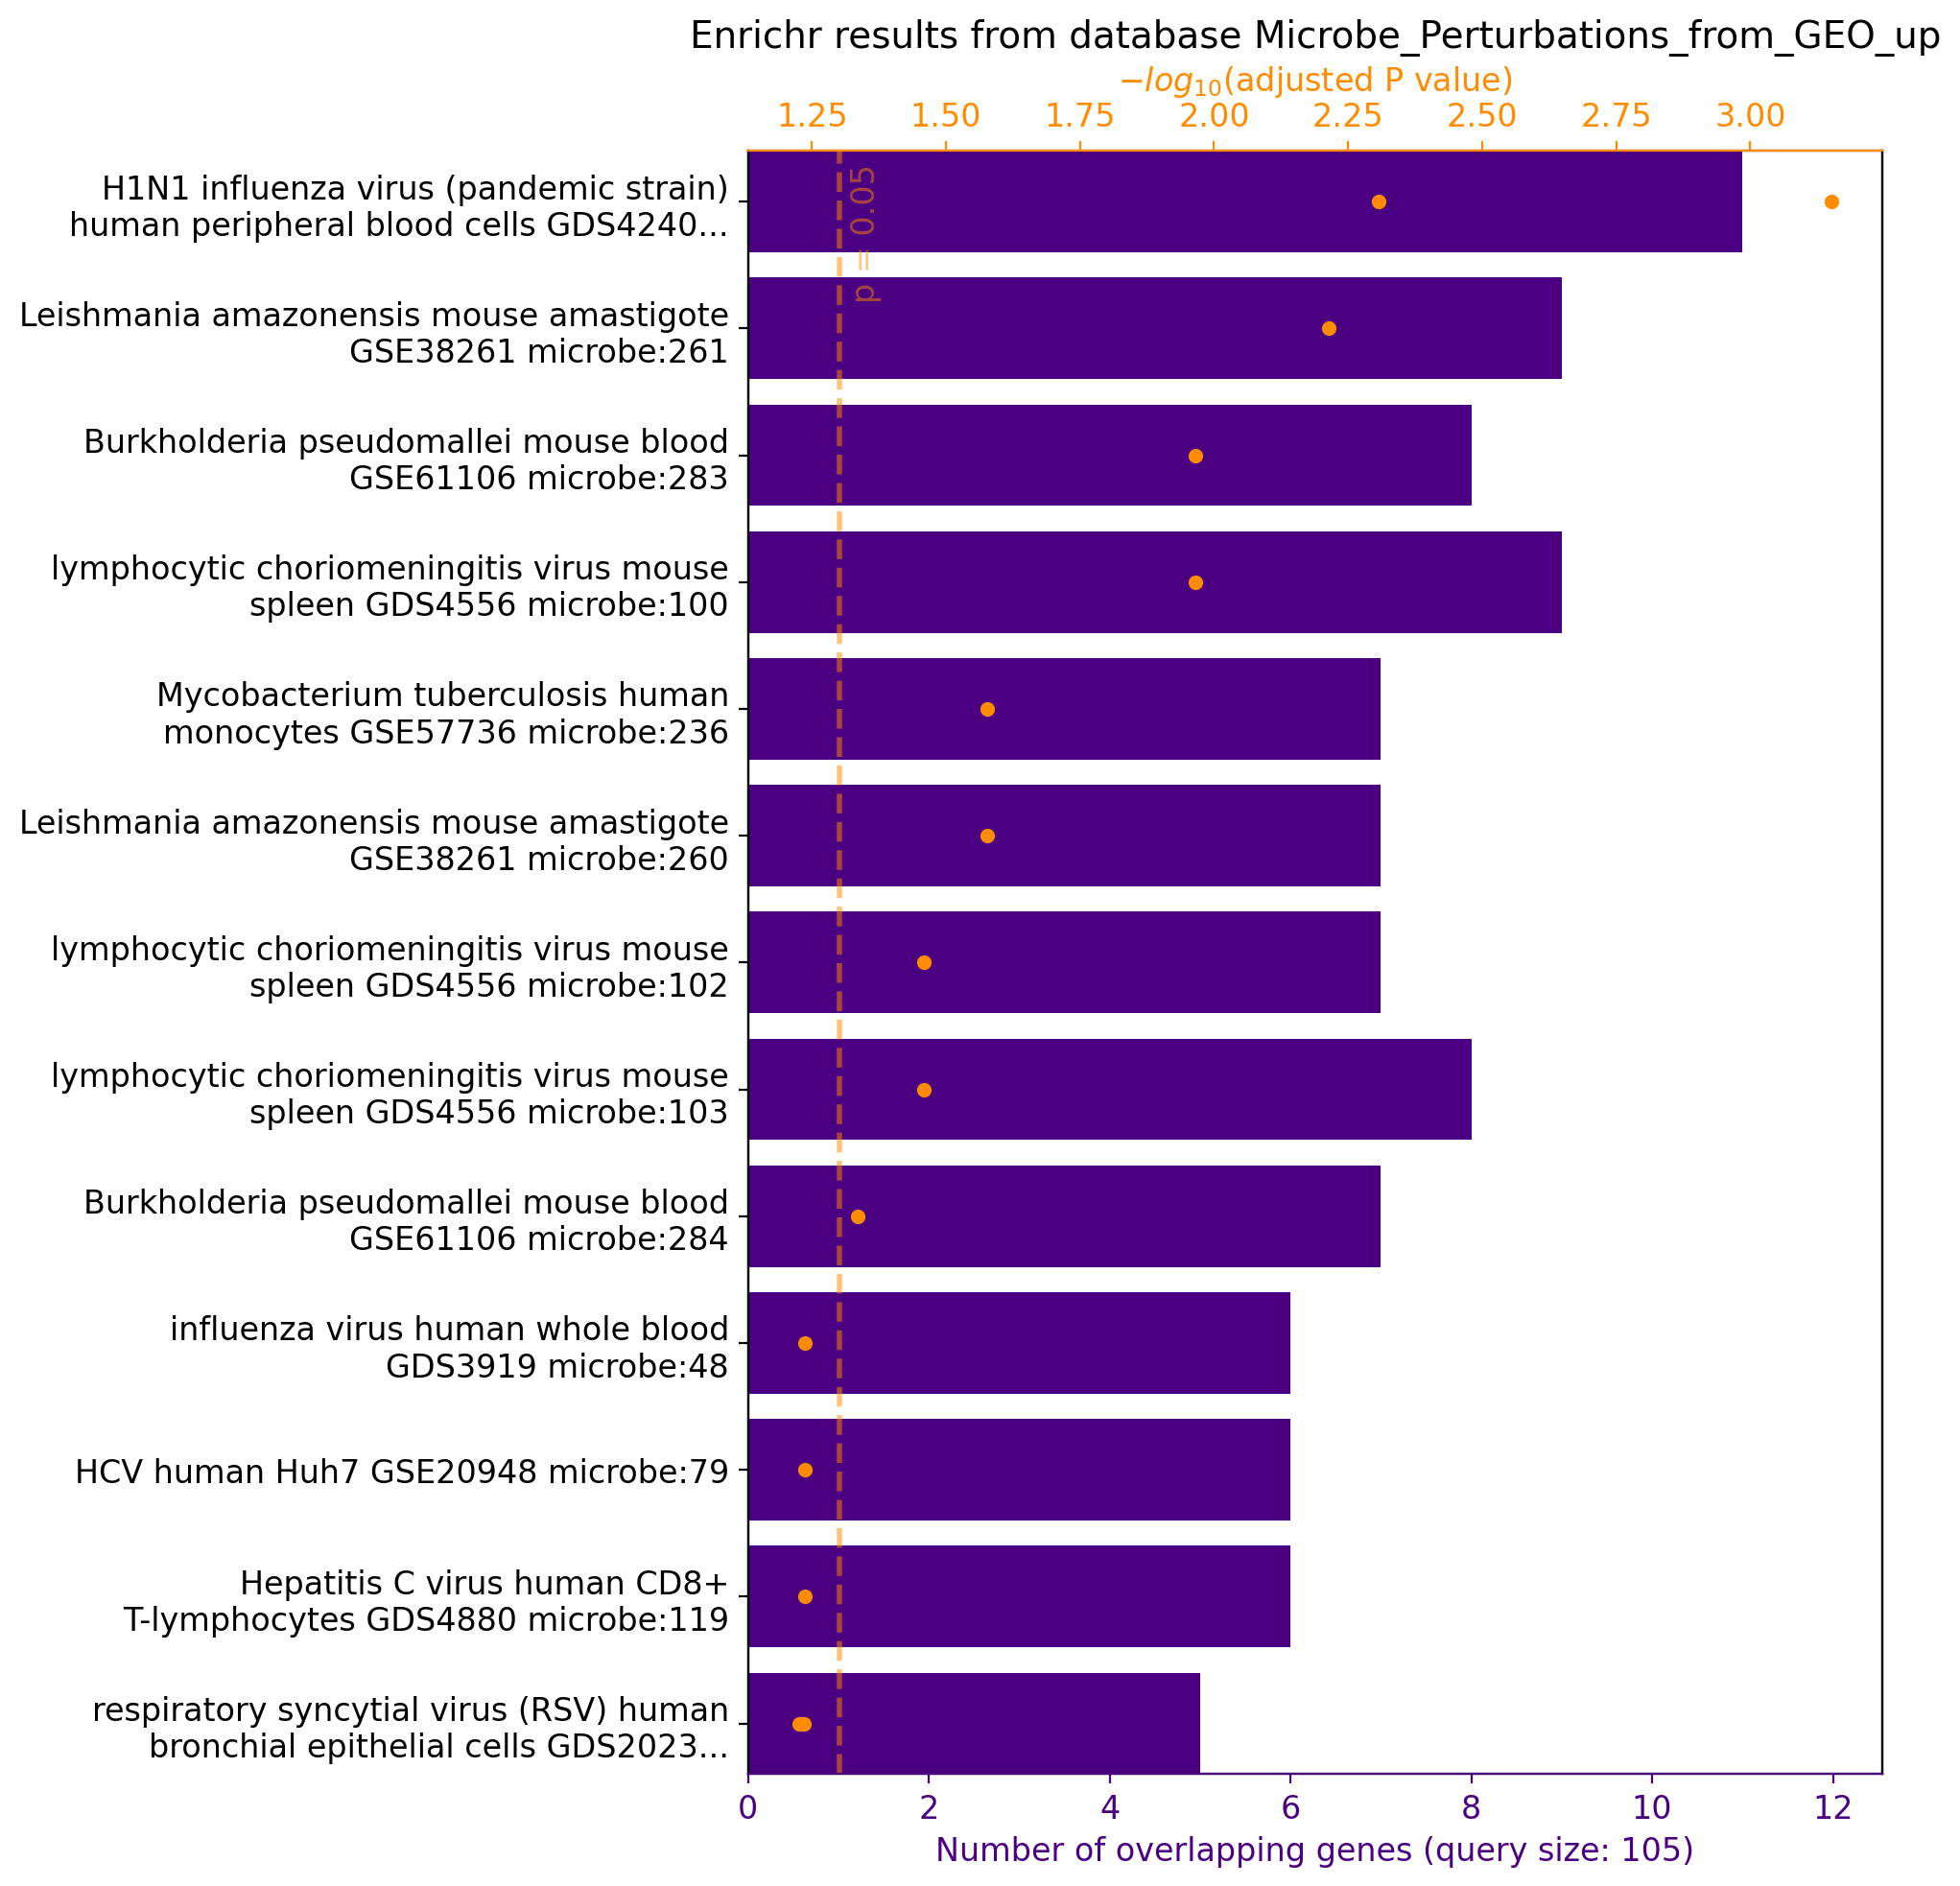

In [14]:
u202260_enrichr_df = gget.enrichr(u202260_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database, background=True, plot=True)

In [15]:
u202260_enrichr_df_kegg = gget.enrichr(u202260_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database2, background=True)
u202260_enrichr_df_kegg

,rank,path_name,p_val,z_score,combined_score,overlapping_genes,adj_p_val,database
0,1,ECM-receptor interaction,0.000005,15.399045,187.217701,"[ITGA3, ITGA2B, TNR, ITGA7, CD36, THBS1]",0.000897,KEGG_2021_Human
1,2,Focal adhesion,0.000509,6.473164,49.089327,"[JUN, ITGA3, ITGA2B, TNR, ITGA7, THBS1]",0.043500,KEGG_2021_Human
2,3,Hematopoietic cell lineage,0.001542,8.676661,56.177117,"[ITGA3, IL1R2, ITGA2B, CD36]",0.068620,KEGG_2021_Human
3,4,Cholesterol metabolism,0.002006,13.052553,81.074616,"[ABCA1, LRPAP1, CD36]",0.068620,KEGG_2021_Human
4,5,Malaria,0.002006,13.052553,81.074616,"[IL10, CD36, THBS1]",0.068620,KEGG_2021_Human
...,...,...,...,...,...,...,...,...
166,167,Endocytosis,0.719448,0.790759,0.260373,[CXCR1],0.736681,KEGG_2021_Human
167,168,MAPK signaling pathway,0.773353,0.676002,0.173746,[JUN],0.787163,KEGG_2021_Human
168,169,Alzheimer disease,0.845332,0.536232,0.090101,[BACE2],0.855336,KEGG_2021_Human
169,170,Olfactory transduction,0.890193,0.452130,0.052590,[CAMK2B],0.895429,KEGG_2021_Human


u102540:

In [16]:
u102540_info_df = gget.info(gene_df["u102540 Ensembl ID"][:n_genes].values, verbose=False)
u102540_info_df.head()

,ensembl_id,uniprot_id,pdb_id,ncbi_gene_id,species,assembly_name,primary_gene_name,ensembl_gene_name,synonyms,parent_gene,protein_names,ensembl_description,uniprot_description,ncbi_description,subcellular_localisation,object_type,biotype,canonical_transcript,seq_region_name,strand,start,end,all_transcripts,transcript_biotypes,transcript_names,transcript_strands,transcript_starts,transcript_ends,all_exons,exon_starts,exon_ends,all_translations,translation_starts,translation_ends
ENSMMUG00000060506,ENSMMUG00000060506.1,NaN,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,Gene,pseudogene,ENSMMUT00000106913.1,3,-1,12741490,12746048,[ENSMMUT00000106913.1],[pseudogene],[nan],[-1],[12741490],[12746048],NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000054927,ENSMMUG00000054927.1,A0A5F8A8A5,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,[nan],NaN,NaN,Gene,protein_coding,ENSMMUT00000105890.1,1,1,90861734,90865529,[ENSMMUT00000105890.1],[protein_coding],[nan],[1],[90861734],[90865529],NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000010860,ENSMMUG00000010860.4,F7G337,NaN,702188,macaca_mulatta,Mmul_10,TOGARAM1,TOGARAM1,[FAM179B],NaN,NaN,TOG array regulator of axonemal microtubules 1...,[nan],NaN,NaN,Gene,protein_coding,ENSMMUT00000015190.4,7,1,107257613,107373808,[ENSMMUT00000015190.4],[protein_coding],[TOGARAM1-201],[1],[107257613],[107373808],NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000050854,ENSMMUG00000050854.1,NaN,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,Gene,lncRNA,ENSMMUT00000100874.1,2,1,82870042,82877262,[ENSMMUT00000100874.1],[lncRNA],[nan],[1],[82870042],[82877262],NaN,NaN,NaN,NaN,NaN,NaN
ENSMMUG00000041006,ENSMMUG00000041006.2,"[A0A1D5QCN3, A0A5F7ZU79]",NaN,712099,macaca_mulatta,Mmul_10,FAM171A2,FAM171A2,[],NaN,"[nan, nan]",family with sequence similarity 171 member A2 ...,,NaN,Membrane,Gene,protein_coding,ENSMMUT00000067981.2,16,-1,55623447,55633911,"[ENSMMUT00000067981.2, ENSMMUT00000094042.1]","[protein_coding, protein_coding]","[FAM171A2-201, FAM171A2-202]","[-1, -1]","[55623447, 55627409]","[55633777, 55633911]",NaN,NaN,NaN,NaN,NaN,NaN


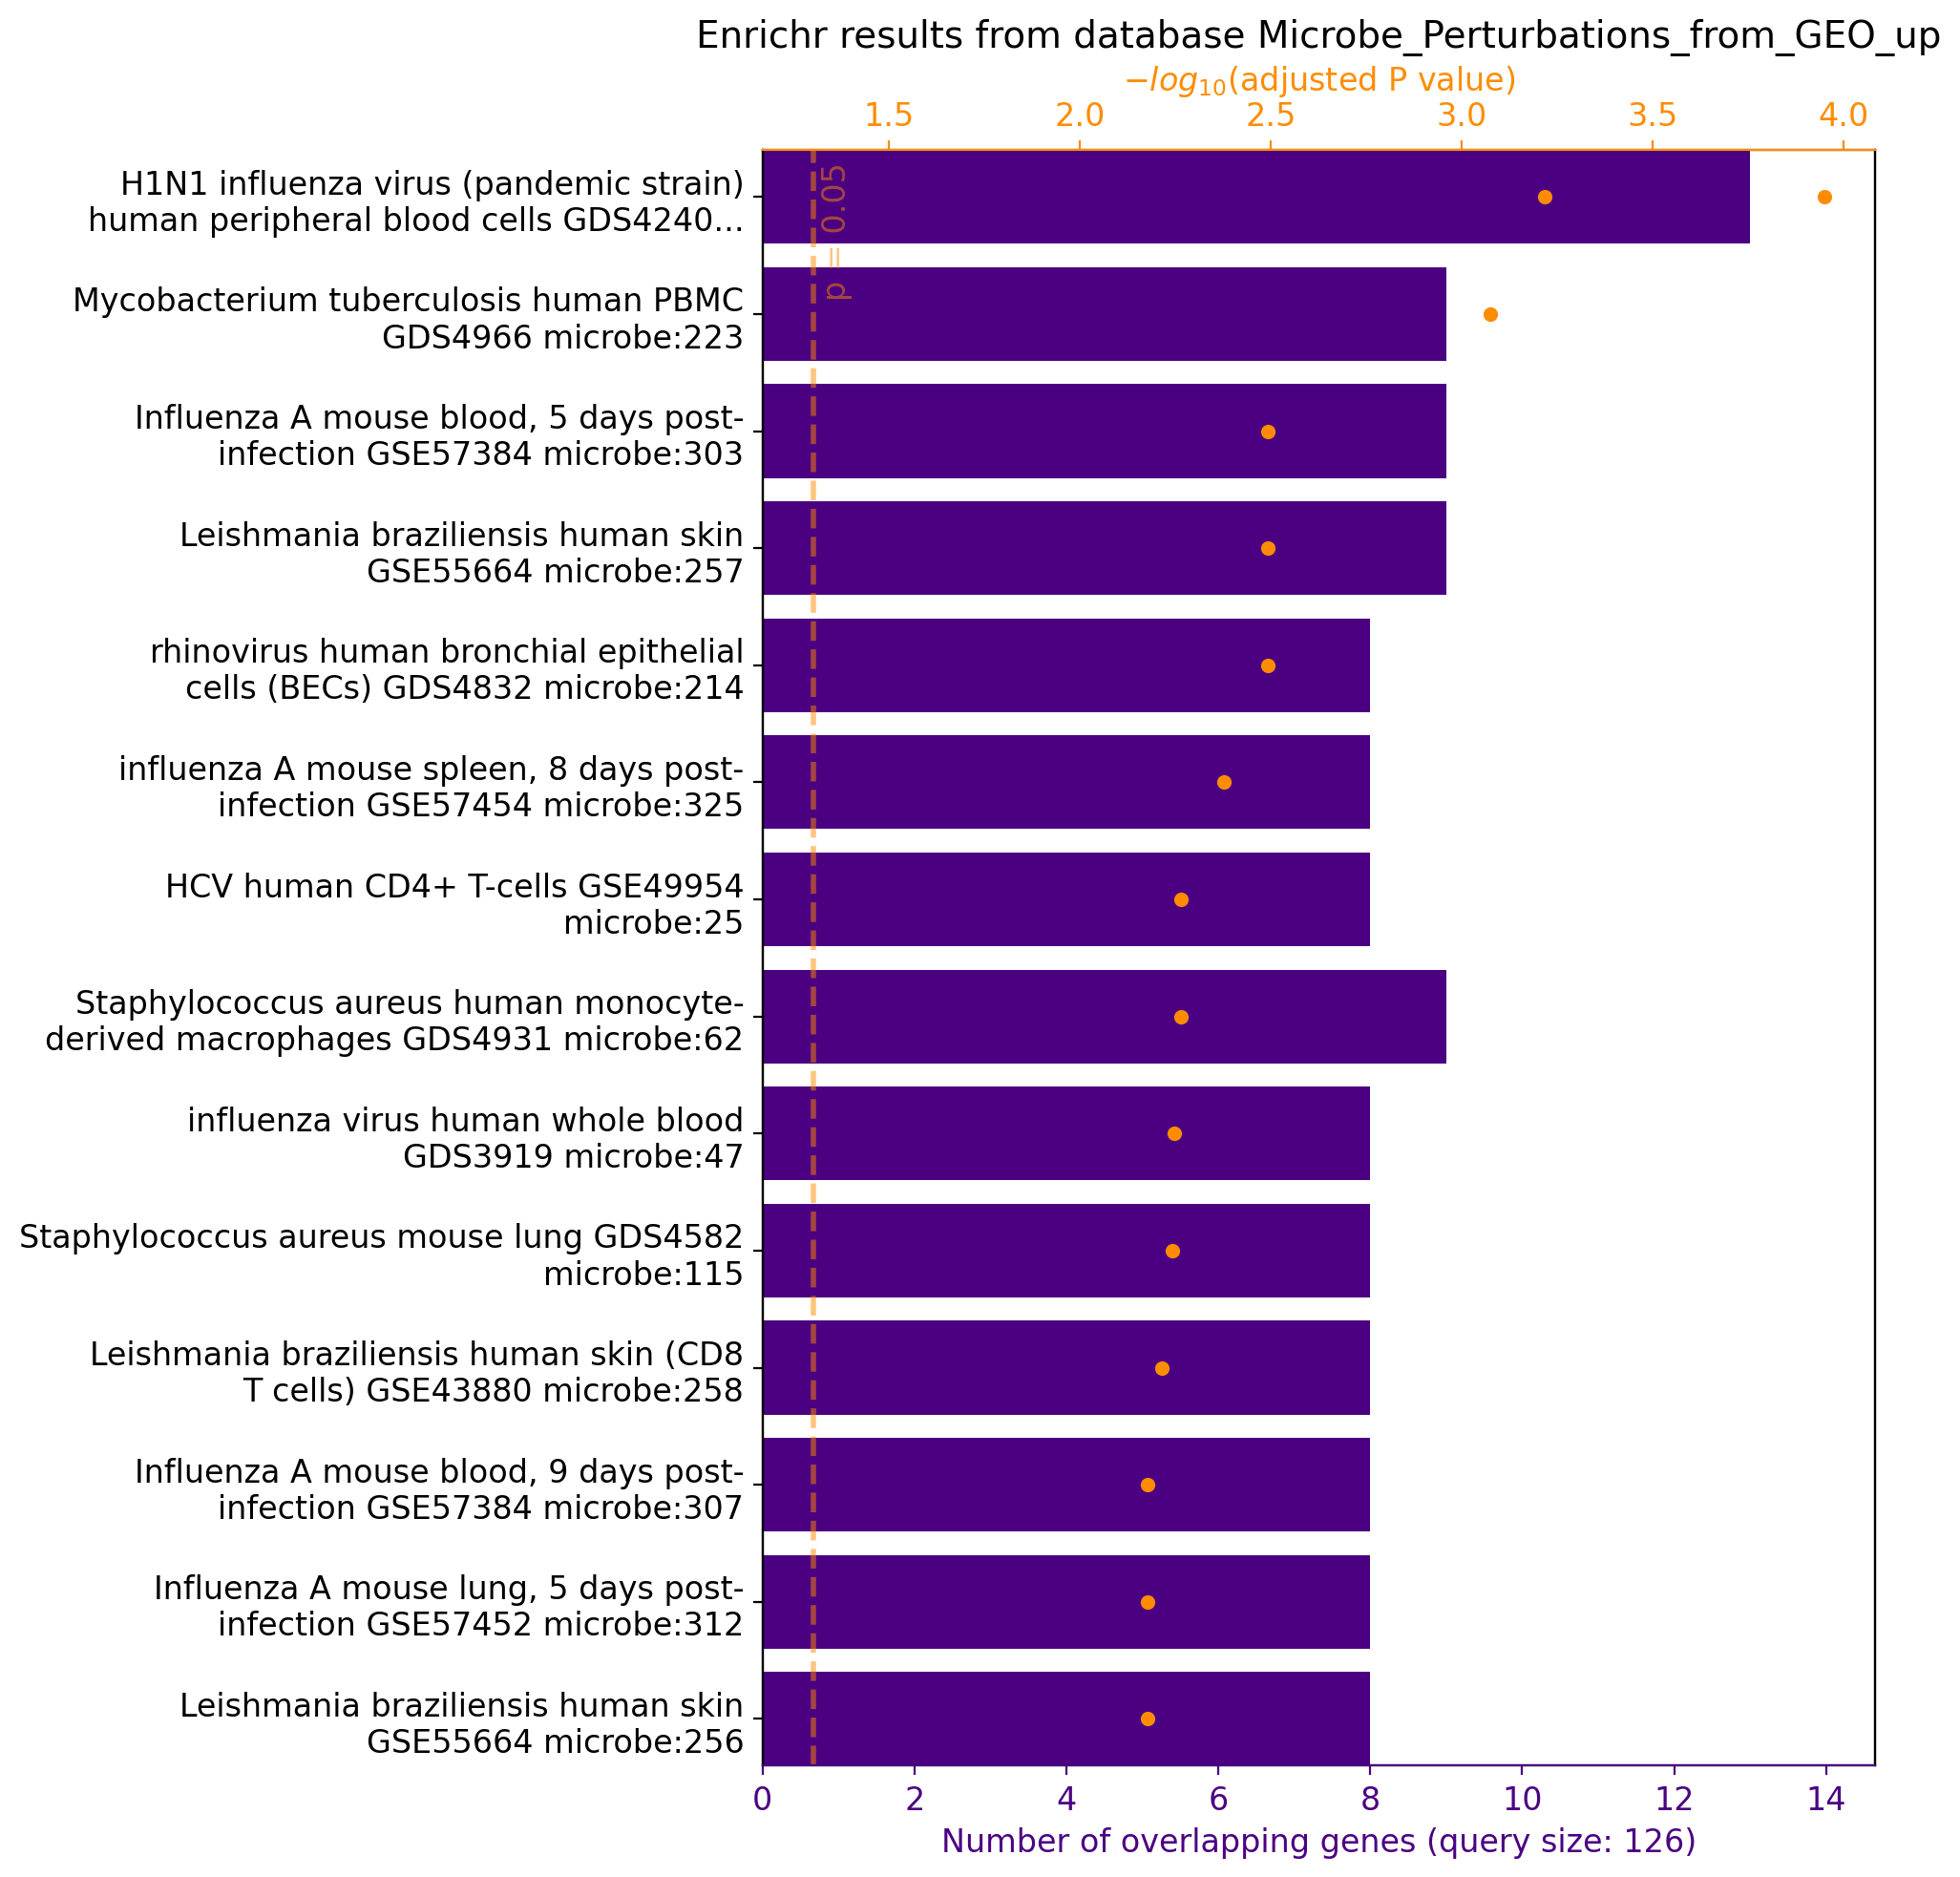

In [17]:
u102540_enrichr_df = gget.enrichr(u102540_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database, background=True, plot=True)

In [18]:
u102540_enrichr_df_kegg = gget.enrichr(u102540_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database2, background=True)
u102540_enrichr_df_kegg

,rank,path_name,p_val,z_score,combined_score,overlapping_genes,adj_p_val,database
0,1,Pathogenic Escherichia coli infection,0.006700,4.462141,22.335754,"[MAPK11, MYO10, MYO6, TNFSF10, MYH11]",0.487374,KEGG_2021_Human
1,2,Fluid shear stress and atherosclerosis,0.009740,5.059950,23.435198,"[NQO1, THBD, MAPK11, CTSL]",0.487374,KEGG_2021_Human
2,3,Apoptosis,0.010735,4.912319,22.273550,"[CTSL, LMNA, TNFSF10, PRF1]",0.487374,KEGG_2021_Human
3,4,Arrhythmogenic right ventricular cardiomyopathy,0.011269,6.835269,30.661114,"[DSP, ITGA2, LMNA]",0.487374,KEGG_2021_Human
4,5,IL-17 signaling pathway,0.019188,5.553719,21.956442,"[MAPK11, LCN2, S100A9]",0.602532,KEGG_2021_Human
...,...,...,...,...,...,...,...,...
168,169,Human T-cell leukemia virus 1 infection,0.735355,0.755464,0.232231,[CREB5],0.752760,KEGG_2021_Human
169,170,Ras signaling pathway,0.755546,0.712491,0.199722,[IGF1R],0.768879,KEGG_2021_Human
170,171,Parkinson disease,0.779660,0.663093,0.165042,[ATP6],0.788779,KEGG_2021_Human
171,172,Alzheimer disease,0.894408,0.444216,0.049571,[ATP6],0.899608,KEGG_2021_Human


### Combine enrichment results into one plot

In [19]:
pd.set_option('display.max_rows', None)

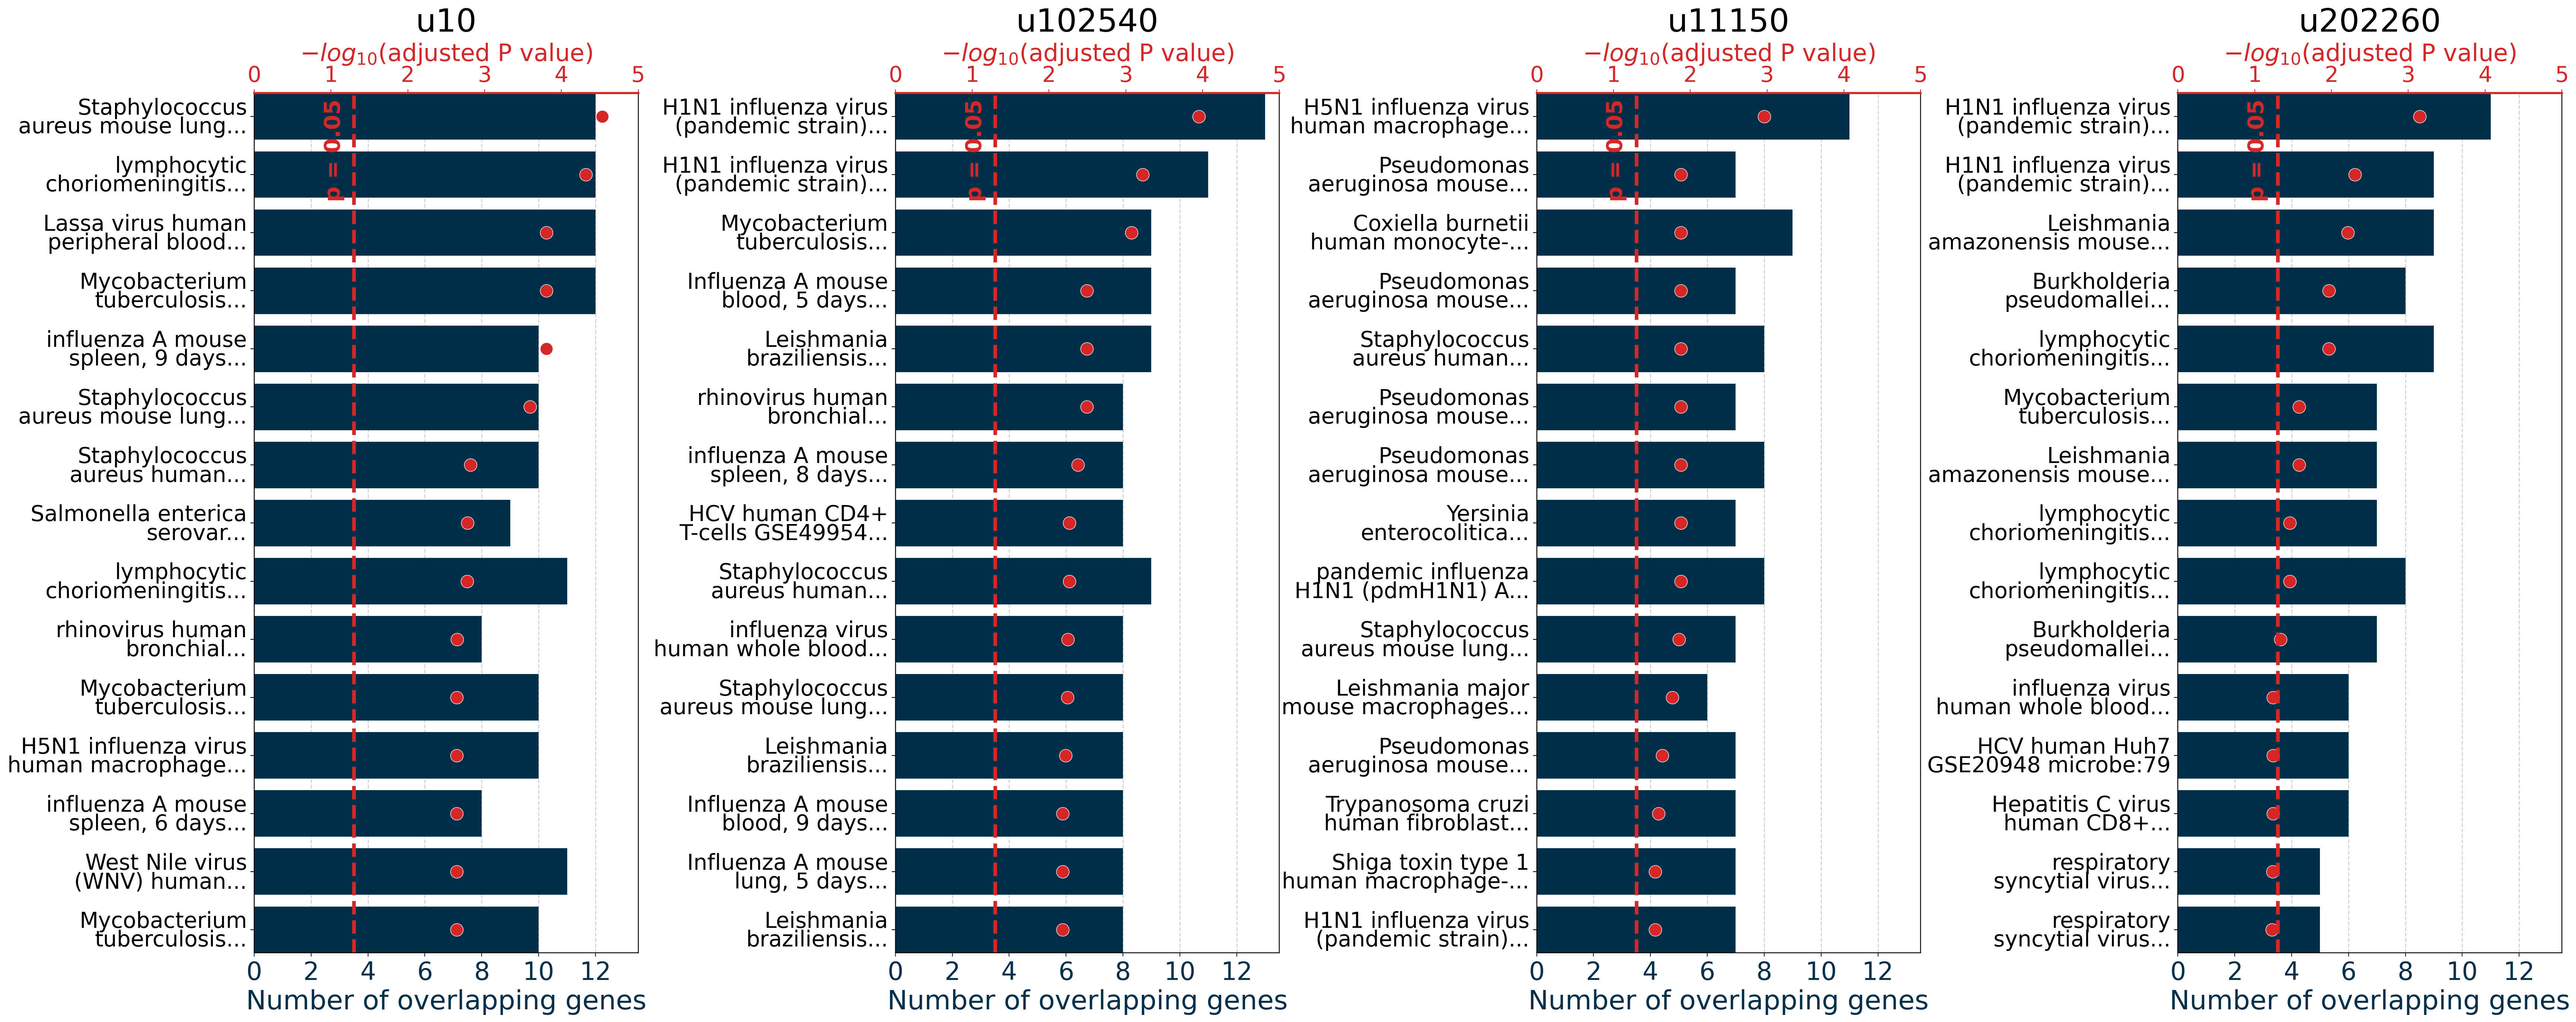

In [20]:
# Number of paths to plot
n_paths = 15
dfs = [
    u10_enrichr_df[:n_paths],
    u102540_enrichr_df[:n_paths],
    u11150_enrichr_df[:n_paths],
    u202260_enrichr_df[:n_paths]
]
vir_names = ["u10", "u102540", "u11150", "u202260"]

fig, axs = plt.subplots(figsize=(40, 15), ncols=4)
fontsize = 21
barcolor = "#003049"
p_val_color = "tab:red" # orange: #f77f00

for i, (df, vir) in enumerate(zip(dfs, vir_names)):
    ax1 = axs[i]

    overlapping_genes = df["overlapping_genes"].values
    path_names = df["path_name"].values
    adj_p_values = df["adj_p_val"].values

    # Get gene counts
    gene_counts = []
    for gene_list in overlapping_genes:
        gene_counts.append(len(gene_list))

    # # Sort by number of genes in pathway
    # overlapping_genes = overlapping_genes[np.argsort(gene_counts)][::-1]
    # path_names = path_names[np.argsort(gene_counts)][::-1]
    # adj_p_values = adj_p_values[np.argsort(gene_counts)][::-1]
    # gene_counts = np.sort(gene_counts)[::-1]

    # Wrap pathway labels
    labels = []
    for label in path_names:
        labels.append(
            textwrap.fill(
                label,
                width=20,
                break_long_words=False,
                max_lines=2,
                placeholder="...",
            )
        )

    # Plot barplot
    # ax1.barh(labels, gene_counts, color=cmap(c_values), align="center")
    ax1.barh(np.arange(len(gene_counts)), gene_counts, color=barcolor, align="center")

#     # Add gene names to bar plot
#     for idx, (gc, og) in enumerate(zip(gene_counts, overlapping_genes)):
#         clean_genes = textwrap.fill(
#                 ", ".join(og),
#                 width=gc/2*10,
#                 break_long_words=False,
#                 max_lines=2,
#                 placeholder="...",
#             )

#         ax1.text(0.05, idx, clean_genes, fontsize=fontsize-2, color="lightgrey", va="center", ha="left")

    ax1.set_yticks(np.arange(len(gene_counts)), labels, linespacing=0.85, fontsize=fontsize)
    ax1.invert_yaxis()

    # Set x-limits
    # ax1.set_xlim(0, ax1.get_xlim()[1]+0.01)
    ax1.set_xlim(left=0, right=13.5)

    # Add adj. P value secondary x-axis
    ax2 = ax1.twiny()
    ax2.scatter(-np.log10(adj_p_values), np.arange(len(gene_counts)), color=p_val_color, s=150, edgecolor="white", lw=0.5)
    # Change label and color of p-value axis
    ax2.set_xlabel(
        "$-log_{10}$(adjusted P value)", fontsize=fontsize+2, color=p_val_color
    )
    ax2.spines["top"].set_color(p_val_color)
    ax2.spines["top"].set_linewidth(2)
    ax2.tick_params(axis="x", colors=p_val_color, labelsize=fontsize)

    # # Set x2-limits
    ax2.set_xlim(left=0, right=5)

    # Add alpha=0.05 p-value cutoff
    ax2.axvline(-np.log10(0.05), color=p_val_color, ls="--", lw=3.5)
    t = ax2.text(
        -np.log10(0.05) - 0.4,
        -0.3,
        "p = 0.05",
        ha="left",
        va="top",
        rotation="vertical",
        fontweight="bold",
        color=p_val_color,
        fontsize=fontsize,
    )
    # t.set_bbox(dict(facecolor='grey', alpha=0.5))

    # Set label and color of count axis
    ax1.set_xlabel(
        # f"Number of overlapping genes (query size: {len(genes_clean)})",
        f"Number of overlapping genes",
        color=barcolor,
        fontsize=fontsize+5,
    )
    # ax2.spines["bottom"].set_color(barcolor)
    # ax2.spines["bottom"].set_linewidth(2)
    ax1.tick_params(axis="x", labelsize=fontsize+3, colors=barcolor)
    # Set bottom x axis to keep only integers since counts cannot be floats
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    # Change fontsize of y-tick labels
    ax1.tick_params(axis="y", labelsize=fontsize)

    # Set title
    ax1.set_title(
        f"{vir}", fontsize=fontsize + 10, pad=10
    )

    # Set axis margins
    ax1.margins(y=0, x=0)

    ax1.grid(True, which="both", color="lightgrey", ls="--", lw=1)
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(False)

    # Remove grids
    # ax1.grid(False)
    # ax2.grid(False)

plt.subplots_adjust(wspace=0.67)

# Save figure
fig.savefig(
    "predictive_genes_enrichment.png", dpi=300, bbox_inches="tight", transparent=True
)

fig.show()